## 다항회귀
- 데이터가 단순한 직선 형태가 아닌 비선형의 형태를 갖고 있을 때
- 각 변수의 거듭제곱을 새로운 변수로 추가하면 선형모델을 사용할 수 있다
- 이렇게 확장된 특성을 선형모델로 훈련시키는 기법을 다항회귀라 한다

#### 분석방법
- scikit-learn PolynomialFeatures 함수로 다항변수를 생성하고
- LinearRegression의 입력값으로 대입하면 된다
- PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order='C')
- degree :다항식의 차수, interaction_only : 교차항을 추가할지 여부, include_bias : bias 컬럼 추가 여부

In [1]:
import pandas as pd

cereal = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [2]:
cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


C:\Users\dbswo\AppData\Local\Temp\ipykernel_7532\195121207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace=True)


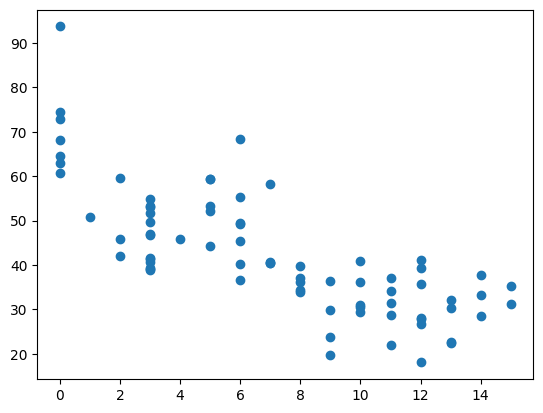

In [4]:
## 설탕 함유랑에 따른 영양등급평가
import matplotlib.pyplot as plt

cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.reset_index(drop=True, inplace=True)
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x, y)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(53,) (53,)
(23,) (23,)


In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [7]:
import numpy as np
X_test_poly = poly_reg.transform(X_test.reshape(-1, 1))
pred = reg.predict(X_test_poly)

np.set_printoptions(precision=2)
print(np.concatenate((pred.reshape(len(pred), 1),
                      y_test.reshape(len(y_test), 1)), 1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1, 1)), y_test)
print(f'mse : {round(mse, 3)}')
print(f'mae : {round(mae, 3)}')
print(f'rmse : {round(rmse, 3)}')
print(f'acc : {round(acc*100, 3)}')

mse : 33.565
mae : 4.606
rmse : 5.794
acc : 74.376


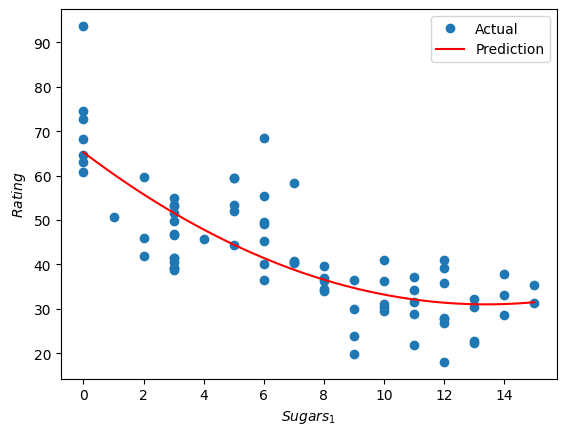

In [13]:
X_new = np.linspace(0, 15, 100).reshape(100, 1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x, y, 'o', label='Actual')
plt.plot(X_new, y_new, '-r', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

In [16]:
## 고차 다항 회귀 실습
X = cereal.iloc[:, :-1].values
y = cereal.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [19]:
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test), y_test)
print(f'mse : {round(mse, 3)}')
print(f'mae : {round(mae, 3)}')
print(f'rmse : {round(rmse, 3)}')
print(f'acc : {round(acc*100, 3)}')

mse : 5.172
mae : 1.811
rmse : 2.274
acc : 96.893


- 성능평가지표를 확인해보면 앞서 수행한 다항회귀모델의 성능보다 고차 다항 회귀의 성능이 높은 것을 확인할 수 있다
- 위의 함수를 통해 거듭제곱과 같은 변수를 추가할 경우 다중공선성이 높아지는 문제가 발생할 수 있다
- 하지만 다중공선성으로 인해 독립변수가 종속변수에 미치는 영향을 해석하기 어려워지는 문제가 발생할 수 있지만
- 모델의 예측력에는 영향을 미치지 않는다
- 따라서 독립변수의 영향을 해석하기 위한 데이터 분석에는 다중공선성을 신경써야 하지만
- 단순히 모델의 예측력을 높이기 위함일 경우 그다지 신경을 쓰지 않아도 된다